In [257]:
import pandas as pd

# Read CSV File
filename = 'worldcities.csv'
df = pd.read_csv(filename)

# Select columns: 'Country', 'Pop', 'Total'filename = 'advertising.csv'
df = df[['country', 'population']]

In [259]:
# Select cities more than 1.000.000 population
df = df[df.population > 5000000]

df.reset_index()
df

,country,population
0,Japan,37732000.0
1,Indonesia,33756000.0
2,India,32226000.0
3,China,26940000.0
4,India,24973000.0
...,...,...
123,United States,5116378.0
124,China,5092611.0
125,China,5054328.0
126,Australia,5031195.0


In [453]:
# Make pivot table for Sum of Population for Cities over 5.000.000
df2 = df.groupby('country', as_index=False).agg({ 'population': 'sum'})
df2.columns = ['country', 'population']
df2 = df2.sort_values(['country'], ascending=[True])

df2.head()

,country,population
0,Angola,9051000.0
1,Argentina,16710000.0
2,Australia,5031195.0
3,Bangladesh,25627000.0
4,Brazil,41006000.0


In [451]:
# Make pivot table for Count of Countries for for Their Cities over 5.000.000
df3 = df.groupby('country', as_index=False).agg({ 'population': 'count'})
df3.columns = ['country', 'count']
df3 = df3.sort_values(['country'], ascending=[True])
df3.head()

,country,count
0,Angola,1
1,Argentina,1
2,Australia,1
3,Bangladesh,2
4,Brazil,3


In [449]:
# Add 2 tables side by side
df_concat = pd.merge(df2, df3, on='country', how='outer')
df_concat.head()

,country,population,count
0,Angola,9051000.0,1
1,Argentina,16710000.0,1
2,Australia,5031195.0,1
3,Bangladesh,25627000.0,2
4,Brazil,41006000.0,3


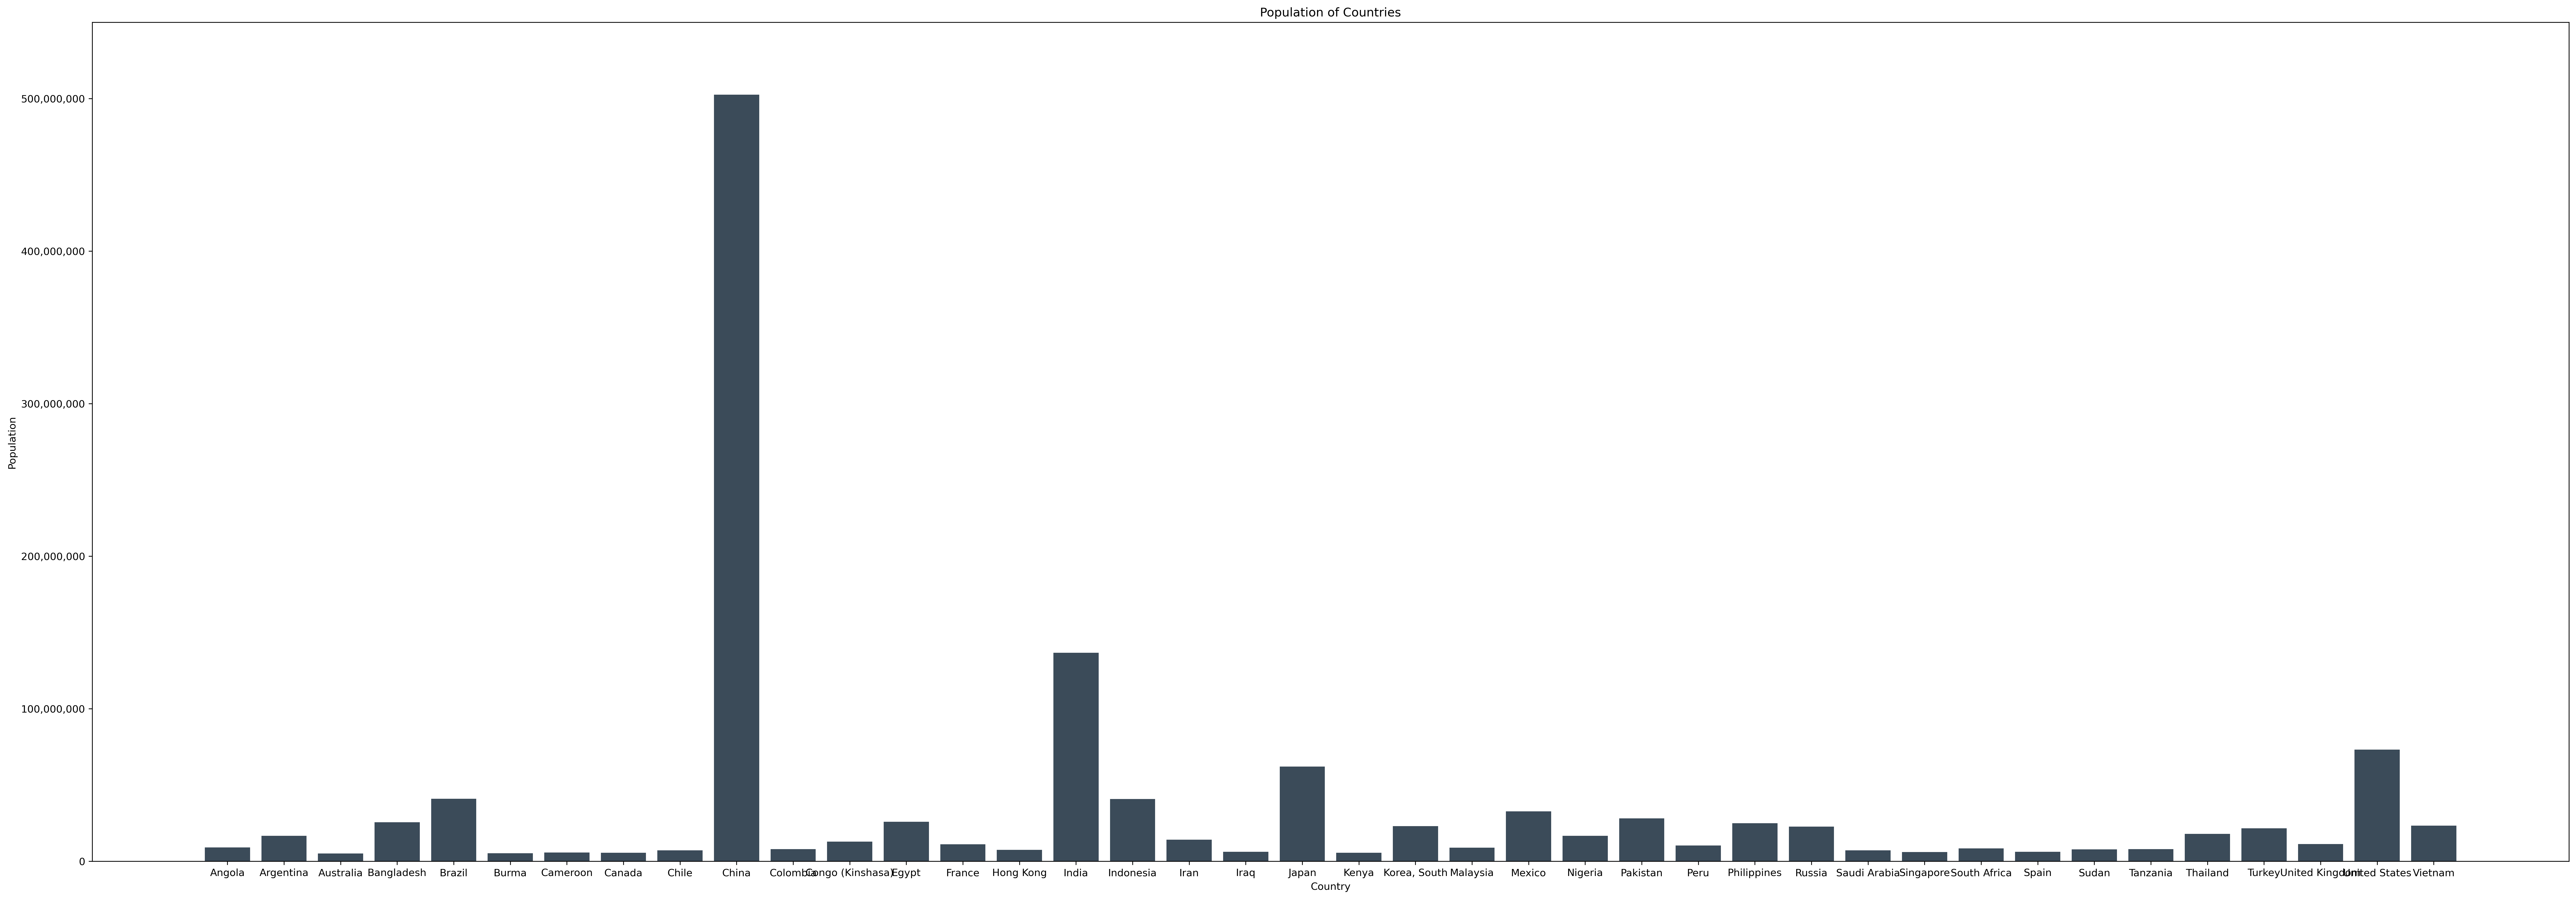

In [349]:
# Make a Bar Chart for SUM OF POPULATION of Countries for for Their Cities over 5.000.000

import numpy as np
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(df_concat['country'], df_concat['population'], color='#3B4B59')
ax.set_title('Population of Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Population')
max_value = 550000000
ticks_loc = np.arange(0, max_value, step=100000000)
ax.set_yticks(ticks_loc)
ax.set_ylim([0,max_value])
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])
ax.grid(False)
fig.set_size_inches(44,15)
fig.set_dpi(300)
plt.show()

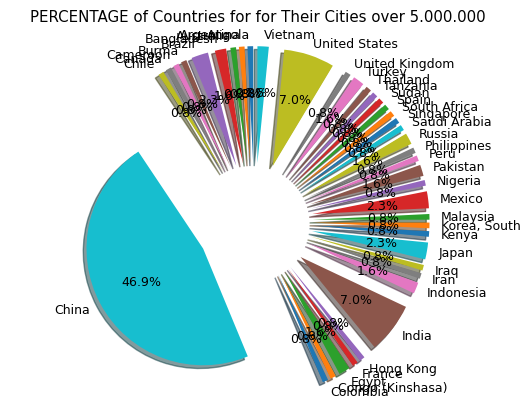

In [447]:
# Make a Pie Chart for PERCENTAGE of Countries for for Their Cities over 5.000.000

labels = df_concat['country']
sizes = df_concat['count']
%matplotlib inline

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_concat['country']
sizes = df_concat['count']


# Explode out the 'Chemical' pie piece by offsetting it a greater amount
explode = (0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

ax.set_title('PERCENTAGE of Countries for for Their Cities over 5.000.000')


plt.show()